In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualization
sns.set_style('whitegrid')

# Load the dataset
data = pd.read_csv('/content/Customertravel.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Display the column names
print("\nColumn names:")
print(data.columns)

# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Fill or drop missing values if necessary
# For simplicity, we will drop rows with missing values
data.dropna(inplace=True)

# Display basic statistics of the dataset
print("\nBasic statistics of the dataset:")
print(data.describe())

# Check data types
print("\nData types of each column:")
print(data.dtypes)


First few rows of the dataset:
   Age FrequentFlyer AnnualIncomeClass  ServicesOpted  \
0   34            No     Middle Income              6   
1   34           Yes        Low Income              5   
2   37            No     Middle Income              3   
3   30            No     Middle Income              2   
4   30            No        Low Income              1   

  AccountSyncedToSocialMedia BookedHotelOrNot  Target  
0                         No              Yes       0  
1                        Yes               No       1  
2                        Yes               No       0  
3                         No               No       0  
4                         No               No       0  

Column names:
Index(['Age', 'FrequentFlyer', 'AnnualIncomeClass', 'ServicesOpted',
       'AccountSyncedToSocialMedia', 'BookedHotelOrNot', 'Target'],
      dtype='object')

Missing values in each column:
Age                           0
FrequentFlyer                 0
AnnualIncomeClass   


Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB
None


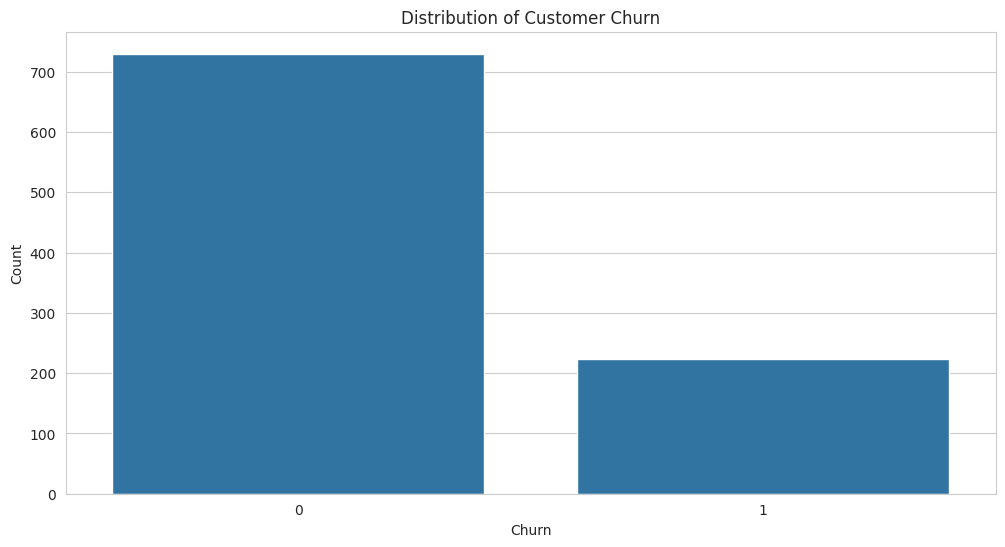

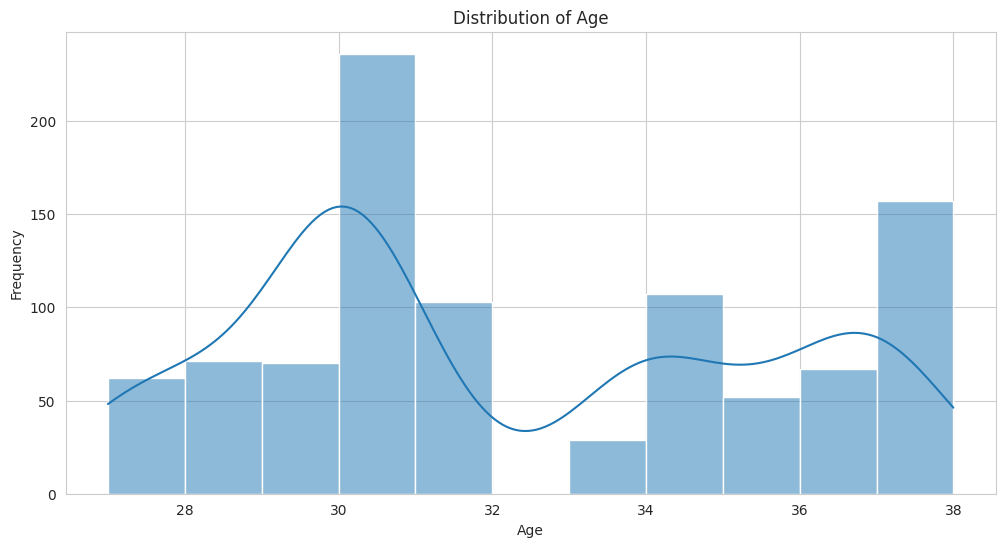

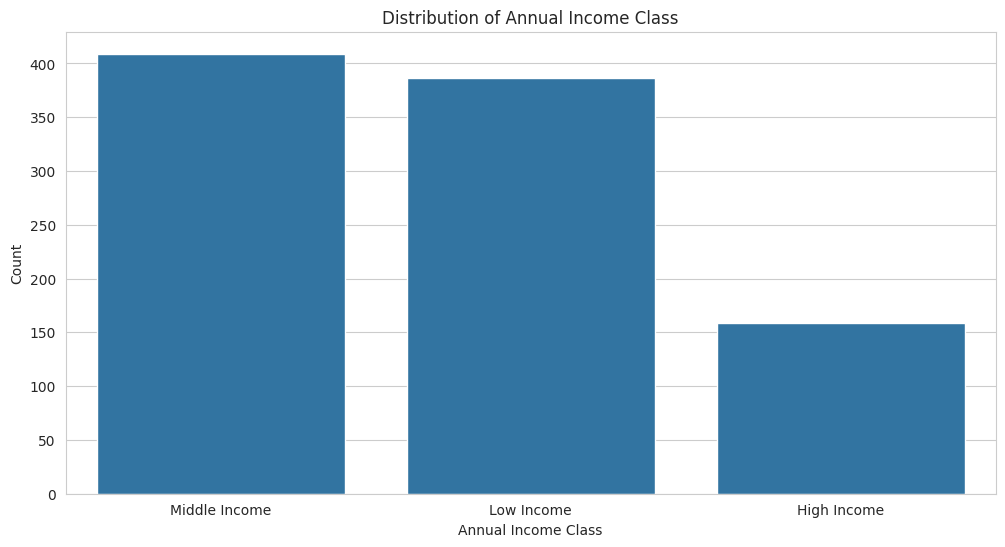

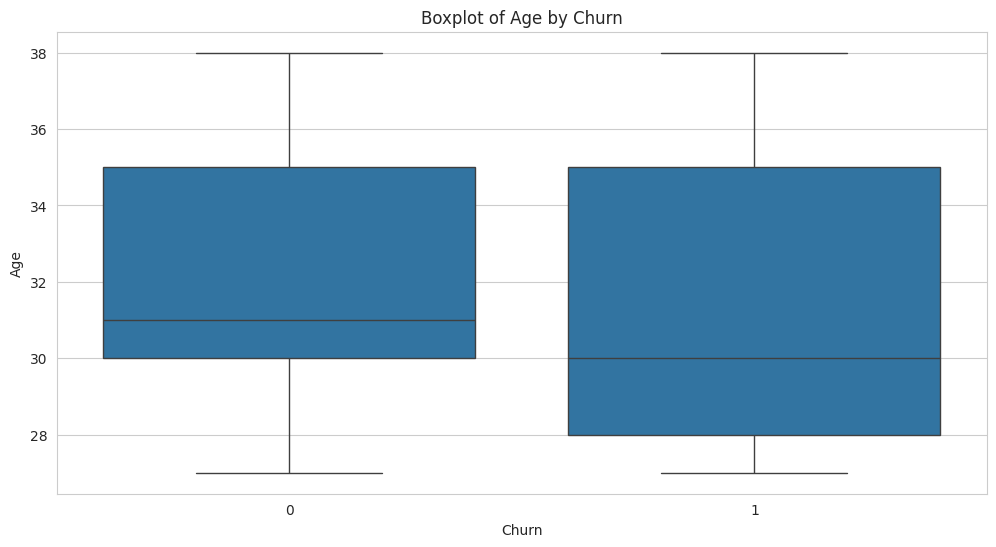

In [2]:
# Summary of the dataset
print("\nSummary of the dataset:")
print(data.info())

# Analyzing the distribution of the target variable
plt.figure(figsize=(12, 6))
sns.countplot(x='Target', data=data)
plt.title('Distribution of Customer Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

# Analyzing the distribution of age
plt.figure(figsize=(12, 6))
sns.histplot(data['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Analyzing the distribution of Annual Income Class
plt.figure(figsize=(12, 6))
sns.countplot(x='AnnualIncomeClass', data=data)
plt.title('Distribution of Annual Income Class')
plt.xlabel('Annual Income Class')
plt.ylabel('Count')
plt.show()

# Boxplot of Age by Churn
plt.figure(figsize=(12, 6))
sns.boxplot(x='Target', y='Age', data=data)
plt.title('Boxplot of Age by Churn')
plt.xlabel('Churn')
plt.ylabel('Age')
plt.show()


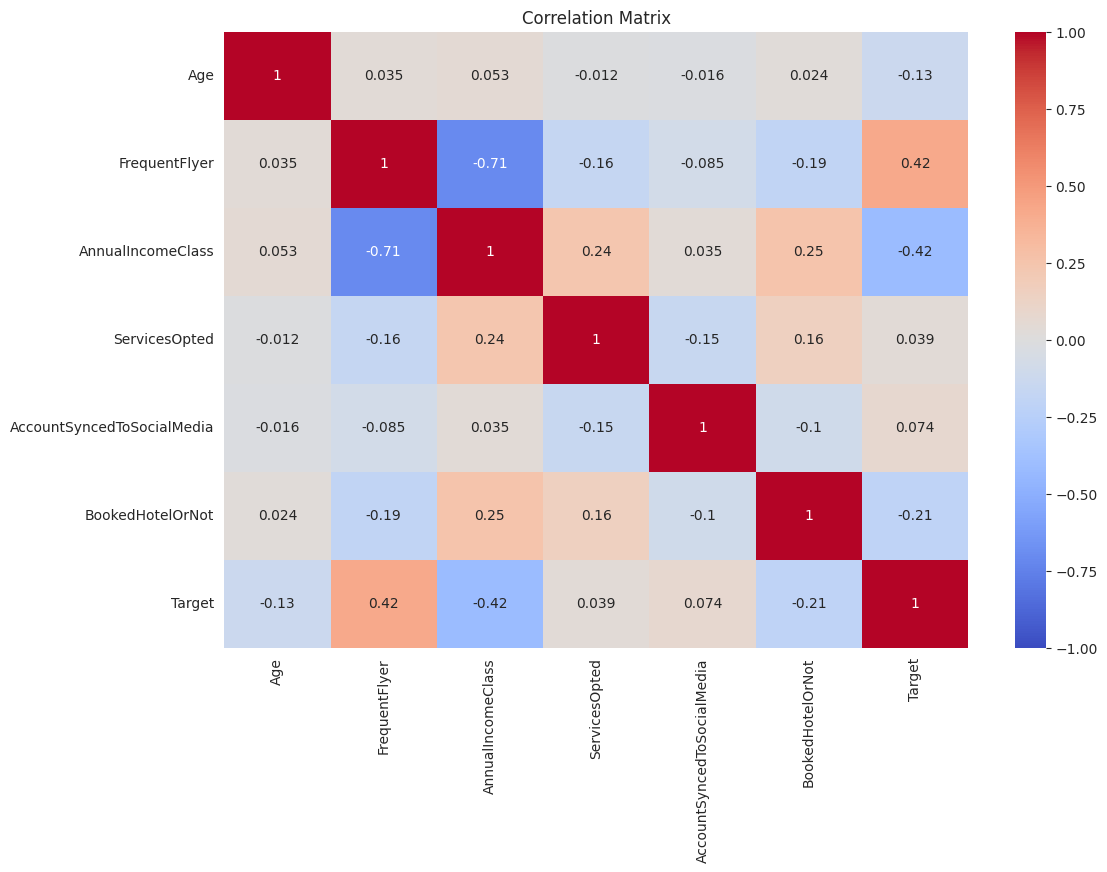

In [3]:
# Convert categorical variables to numerical if needed
data['FrequentFlyer'] = data['FrequentFlyer'].astype('category').cat.codes
data['AnnualIncomeClass'] = data['AnnualIncomeClass'].astype('category').cat.codes
data['ServicesOpted'] = data['ServicesOpted'].astype('category').cat.codes
data['AccountSyncedToSocialMedia'] = data['AccountSyncedToSocialMedia'].astype('category').cat.codes
data['BookedHotelOrNot'] = data['BookedHotelOrNot'].astype('category').cat.codes

# Correlation matrix to understand relationships between numerical features
correlation_matrix = data.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


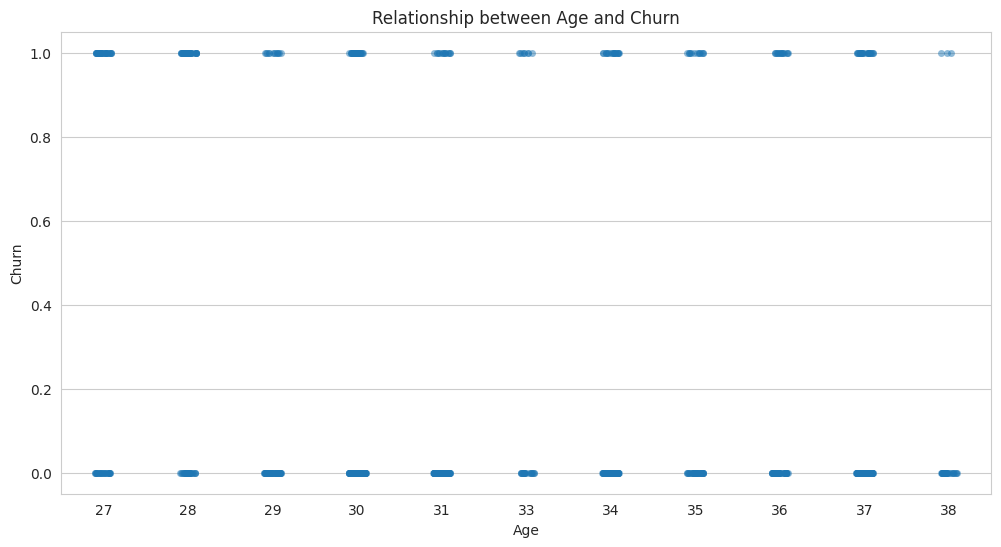

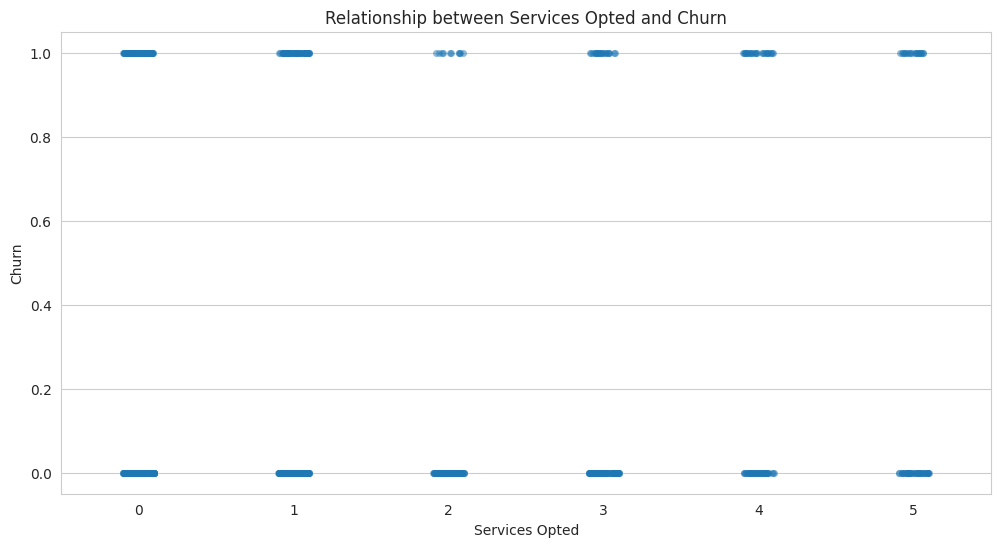

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Strip plot between age and churn
plt.figure(figsize=(12, 6))
sns.stripplot(x='Age', y='Target', data=data, jitter=True, alpha=0.5)
plt.title('Relationship between Age and Churn')
plt.xlabel('Age')
plt.ylabel('Churn')
plt.show()

# Strip plot between services opted and churn
plt.figure(figsize=(12, 6))
sns.stripplot(x='ServicesOpted', y='Target', data=data, jitter=True, alpha=0.5)
plt.title('Relationship between Services Opted and Churn')
plt.xlabel('Services Opted')
plt.ylabel('Churn')
plt.show()


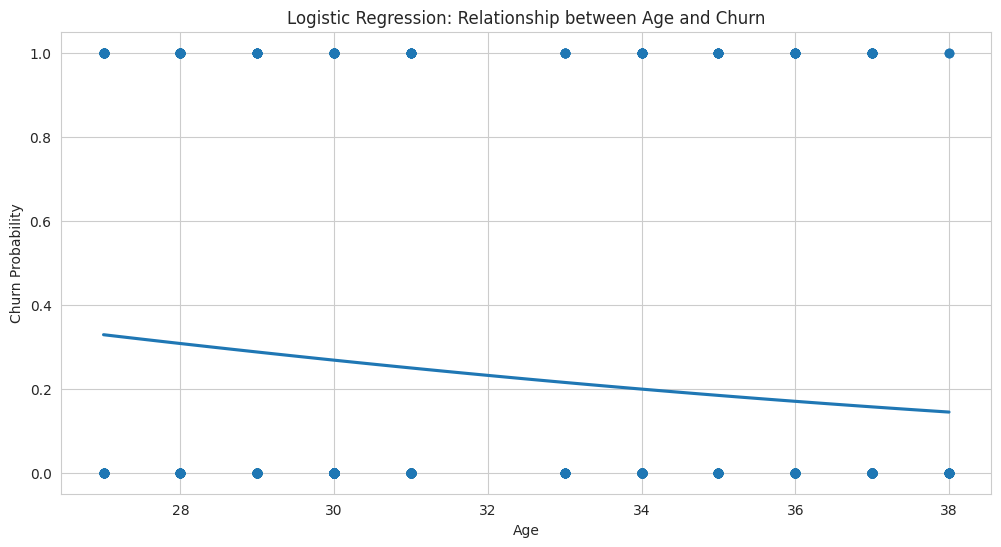

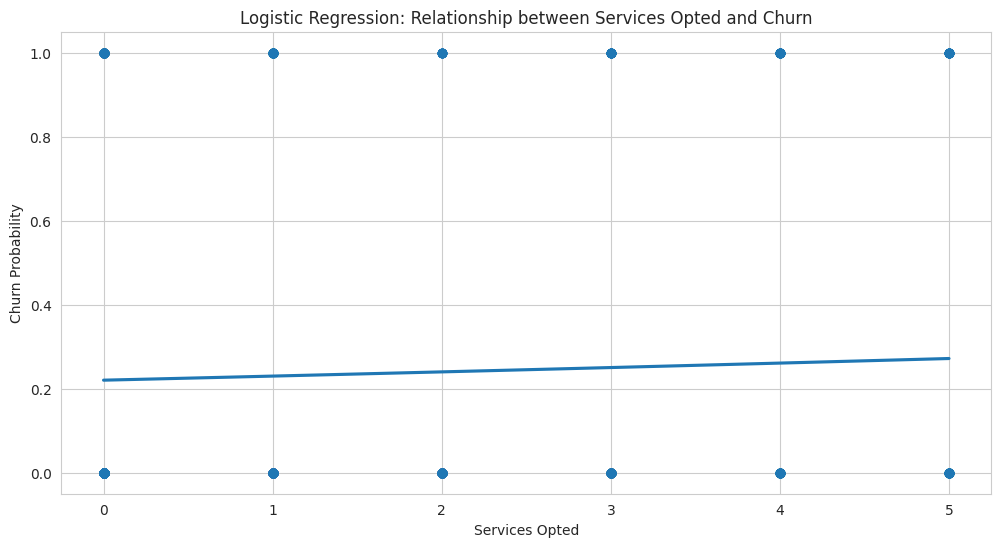

In [6]:
# Logistic regression plot between age and churn
plt.figure(figsize=(12, 6))
sns.regplot(x='Age', y='Target', data=data, logistic=True, ci=None)
plt.title('Logistic Regression: Relationship between Age and Churn')
plt.xlabel('Age')
plt.ylabel('Churn Probability')
plt.show()

# Logistic regression plot between services opted and churn
plt.figure(figsize=(12, 6))
sns.regplot(x='ServicesOpted', y='Target', data=data, logistic=True, ci=None)
plt.title('Logistic Regression: Relationship between Services Opted and Churn')
plt.xlabel('Services Opted')
plt.ylabel('Churn Probability')
plt.show()


In [7]:
# Import necessary libraries for modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Define the feature variables and target variable
X = data.drop('Target', axis=1)
y = data['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred = model.predict(X_test)

# Display the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       219
           1       0.79      0.66      0.72        68

    accuracy                           0.88       287
   macro avg       0.84      0.80      0.82       287
weighted avg       0.87      0.88      0.87       287


Confusion Matrix:
[[207  12]
 [ 23  45]]


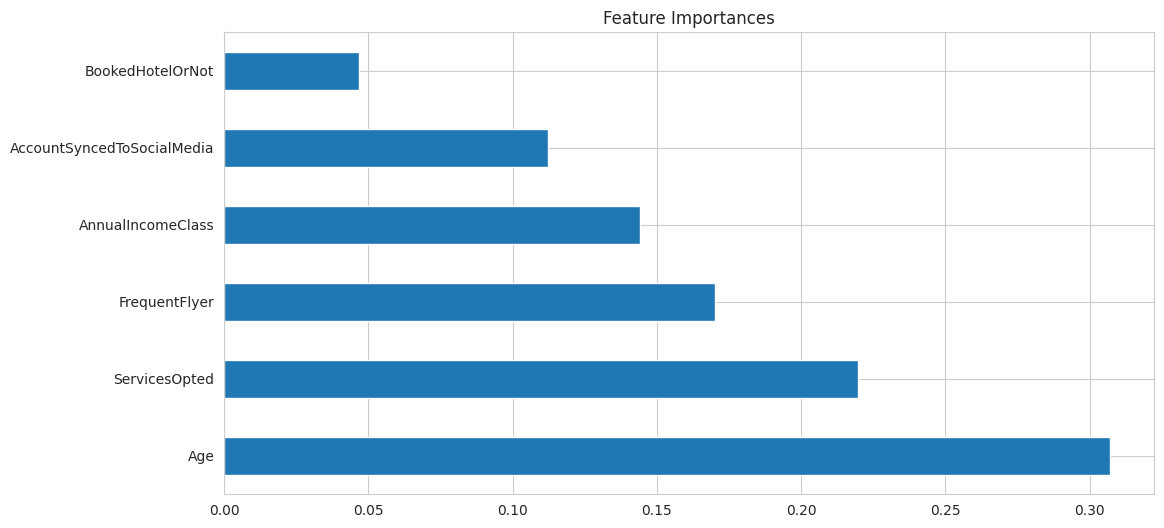

In [8]:
# Plot feature importance
plt.figure(figsize=(12, 6))
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importances')
plt.show()


<Figure size 1500x1500 with 0 Axes>

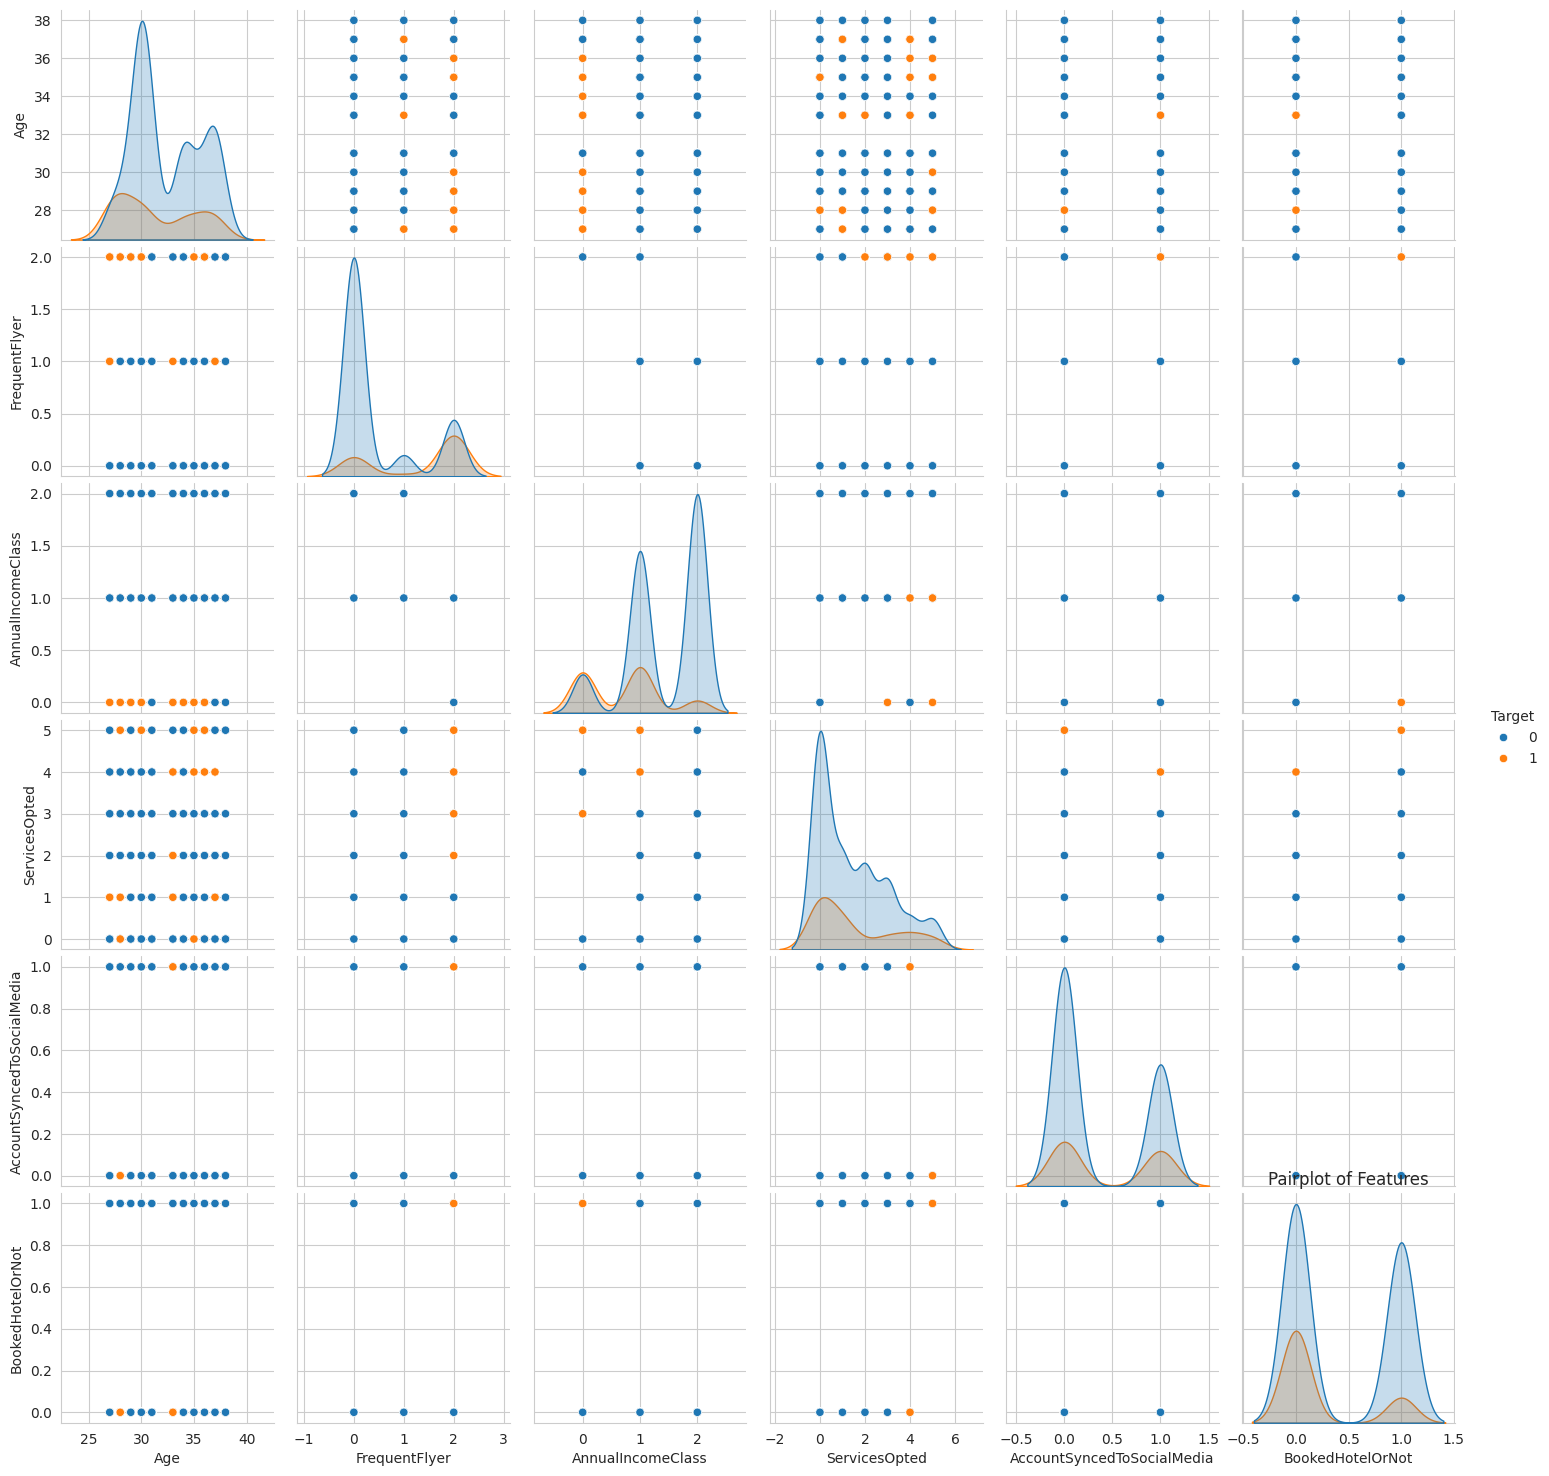

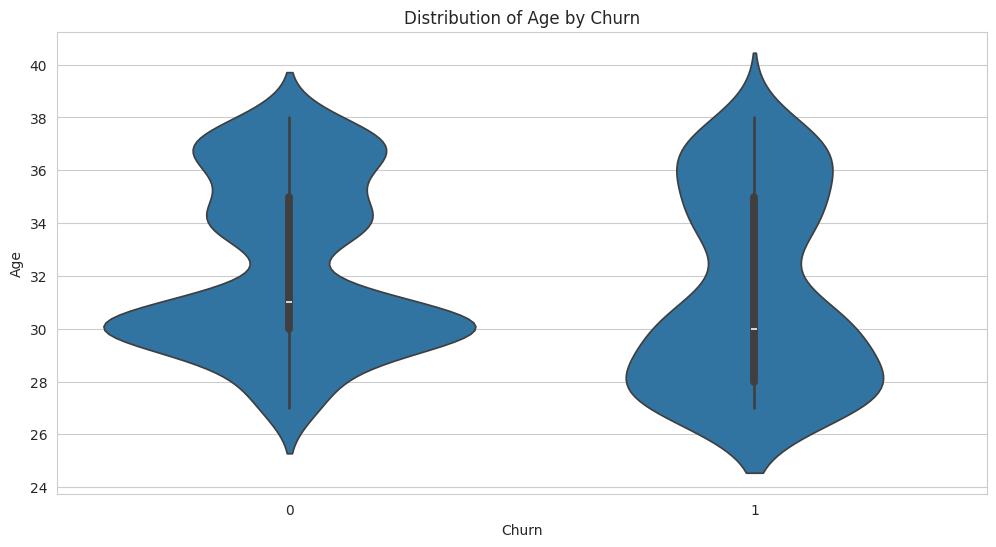

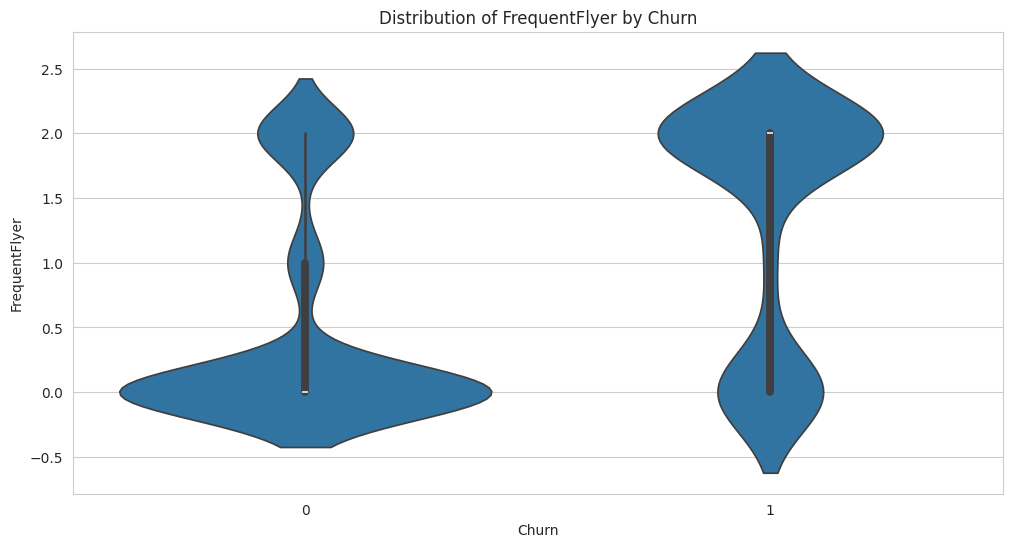

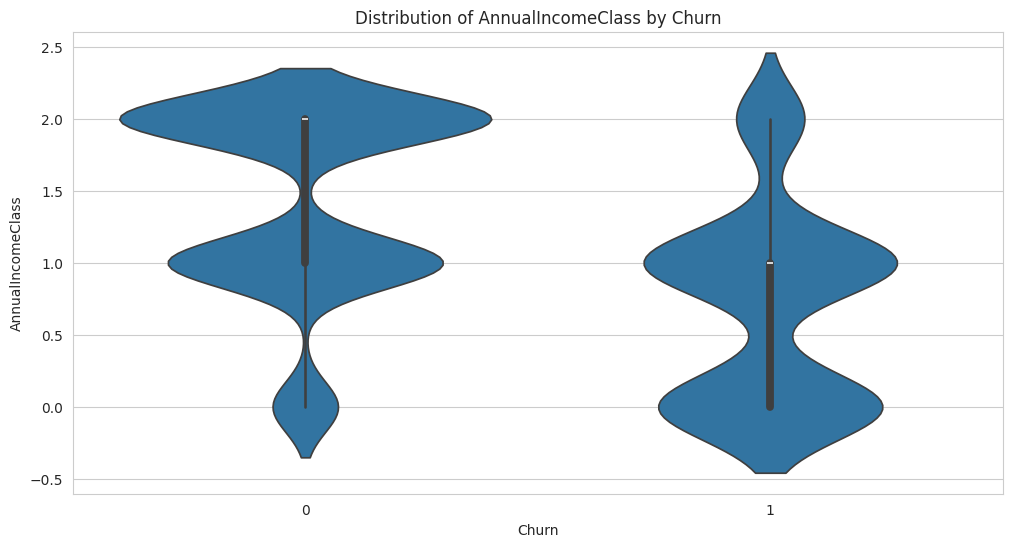

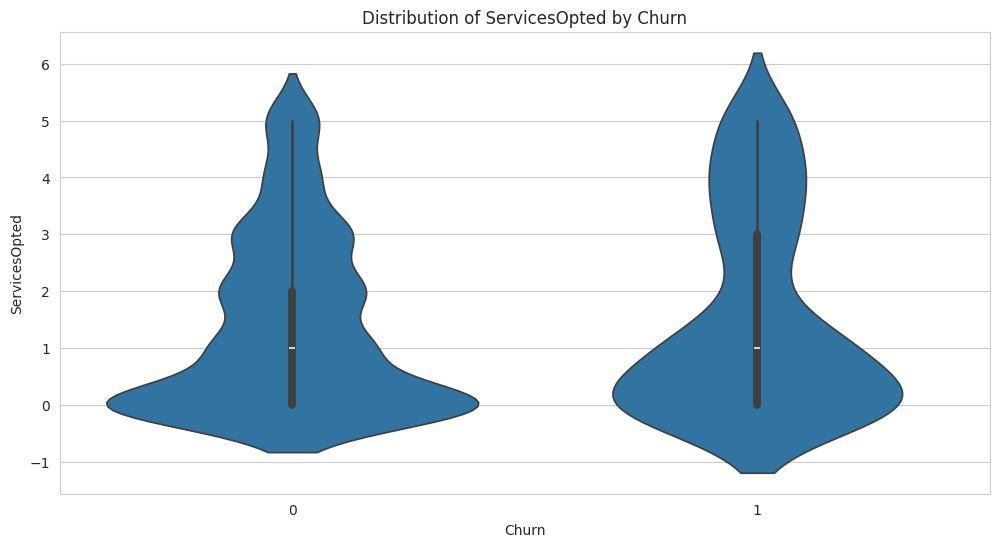

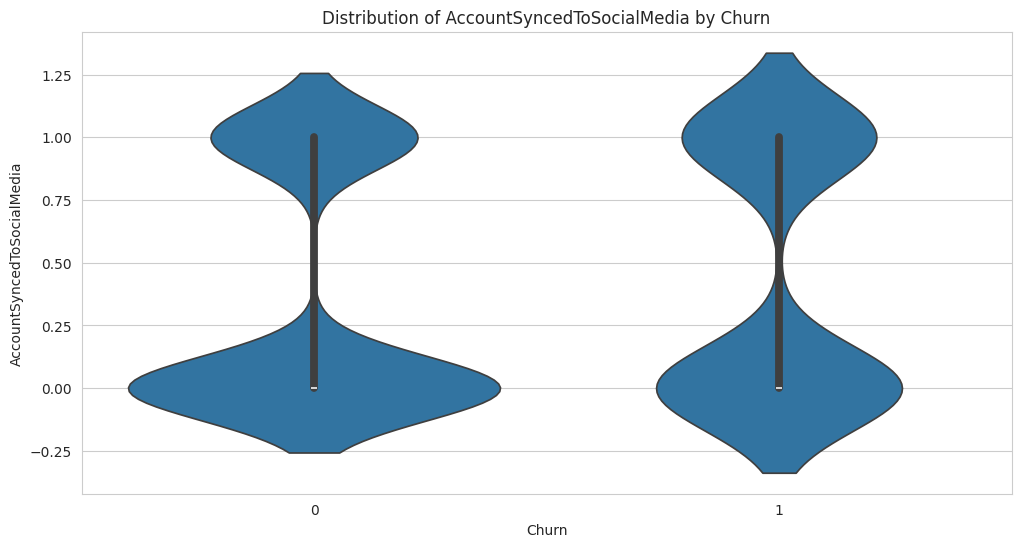

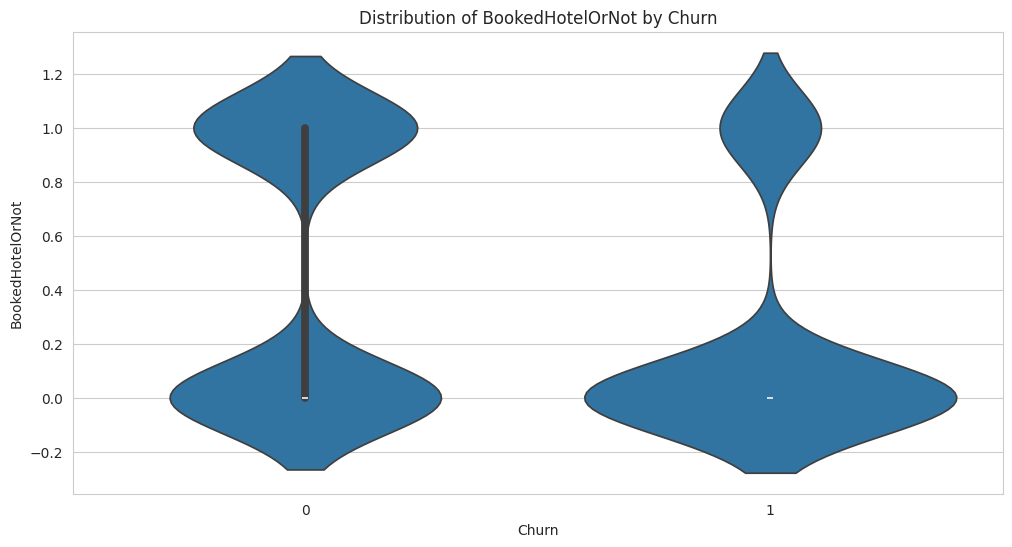

In [9]:
# Pairplot to see the interaction between features
plt.figure(figsize=(15, 15))
sns.pairplot(data, hue='Target', diag_kind='kde')
plt.title('Pairplot of Features')
plt.show()

# Violin plot to see the distribution of each feature by churn
for column in data.columns:
    if column != 'Target':
        plt.figure(figsize=(12, 6))
        sns.violinplot(x='Target', y=column, data=data)
        plt.title(f'Distribution of {column} by Churn')
        plt.xlabel('Churn')
        plt.ylabel(column)
        plt.show()


In [13]:
# Import necessary libraries
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/Customertravel.csv')

# Print column names to verify
print(data.columns)


Index(['Age', 'FrequentFlyer', 'AnnualIncomeClass', 'ServicesOpted',
       'AccountSyncedToSocialMedia', 'BookedHotelOrNot', 'Target'],
      dtype='object')


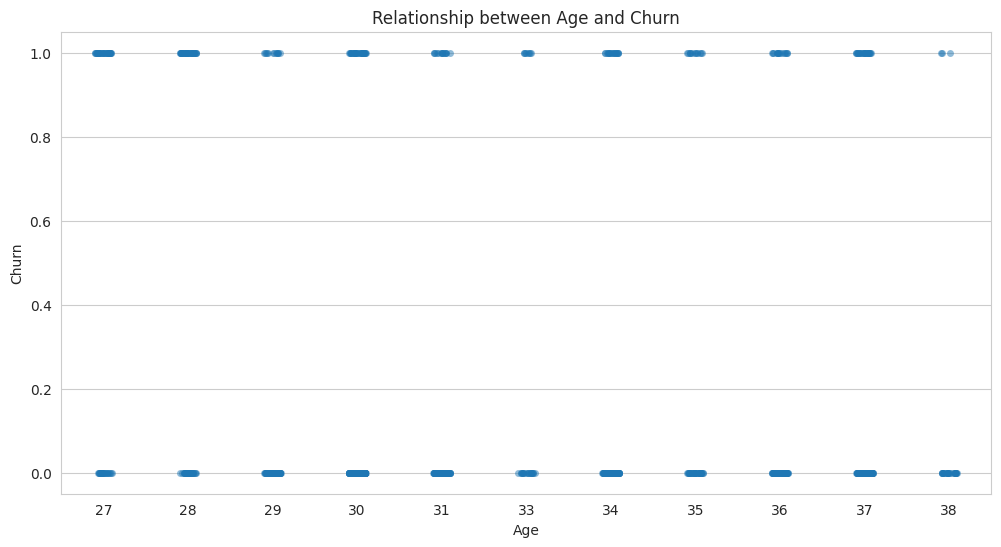

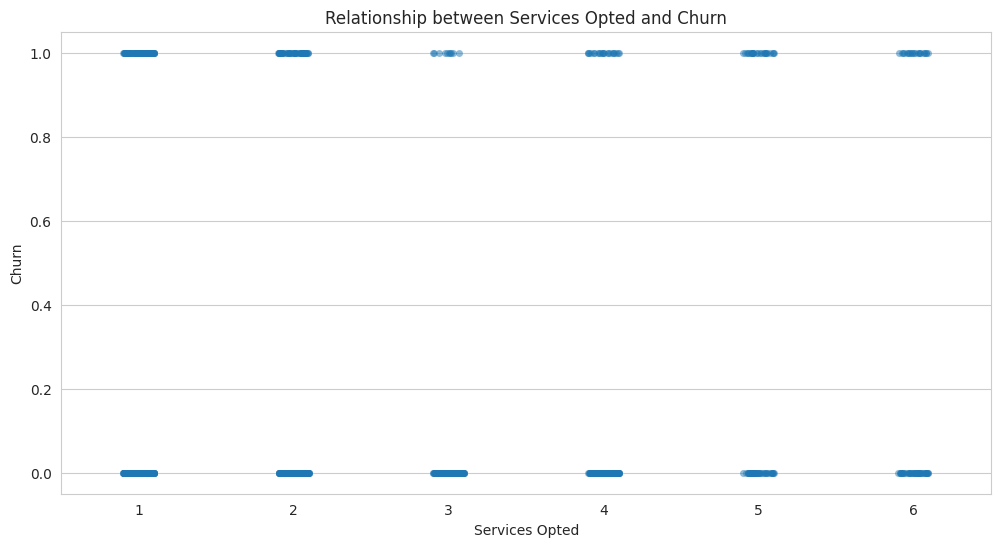

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Strip plot between age and churn
plt.figure(figsize=(12, 6))
sns.stripplot(x='Age', y='Target', data=data, jitter=True, alpha=0.5)
plt.title('Relationship between Age and Churn')
plt.xlabel('Age')
plt.ylabel('Churn')
plt.show()

# Strip plot between services opted and churn
plt.figure(figsize=(12, 6))
sns.stripplot(x='ServicesOpted', y='Target', data=data, jitter=True, alpha=0.5)
plt.title('Relationship between Services Opted and Churn')
plt.xlabel('Services Opted')
plt.ylabel('Churn')
plt.show()


In [15]:
from sklearn.model_selection import GridSearchCV

# Define the model and the parameters grid
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

# Best estimator
best_rf = grid_search.best_estimator_

# Predict using the best estimator
y_pred_best = best_rf.predict(X_test)

# Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       219
           1       0.80      0.69      0.74        68

    accuracy                           0.89       287
   macro avg       0.85      0.82      0.83       287
weighted avg       0.88      0.89      0.88       287


Confusion Matrix:
[[207  12]
 [ 21  47]]



ROC AUC Score: 0.9578632822992211


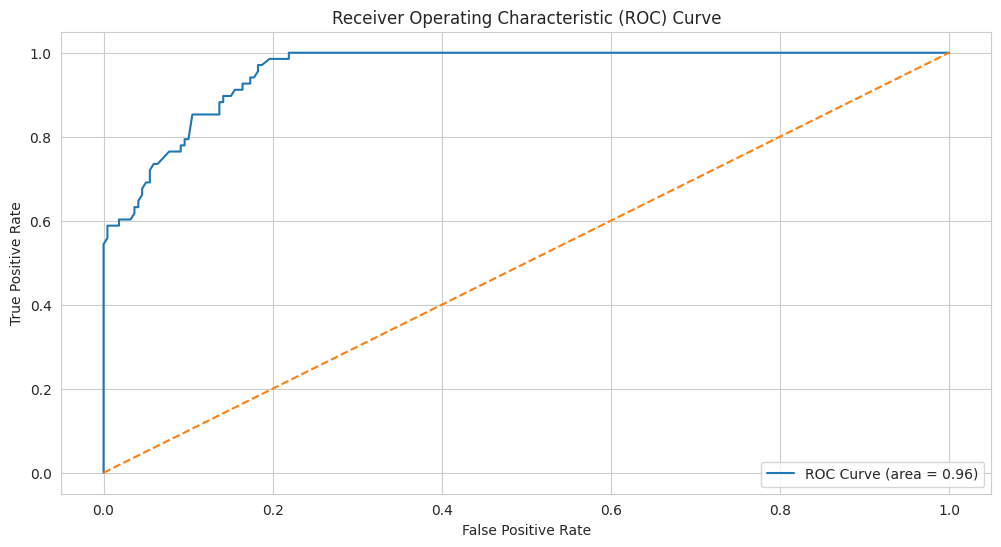

In [16]:
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1])
print(f"\nROC AUC Score: {roc_auc}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, best_rf.predict_proba(X_test)[:, 1])
plt.figure(figsize=(12, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



Classification Report (Ensemble):
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       219
           1       0.78      0.57      0.66        68

    accuracy                           0.86       287
   macro avg       0.83      0.76      0.79       287
weighted avg       0.85      0.86      0.85       287


Confusion Matrix (Ensemble):
[[208  11]
 [ 29  39]]

ROC AUC Score (Ensemble): 0.9427544990598979


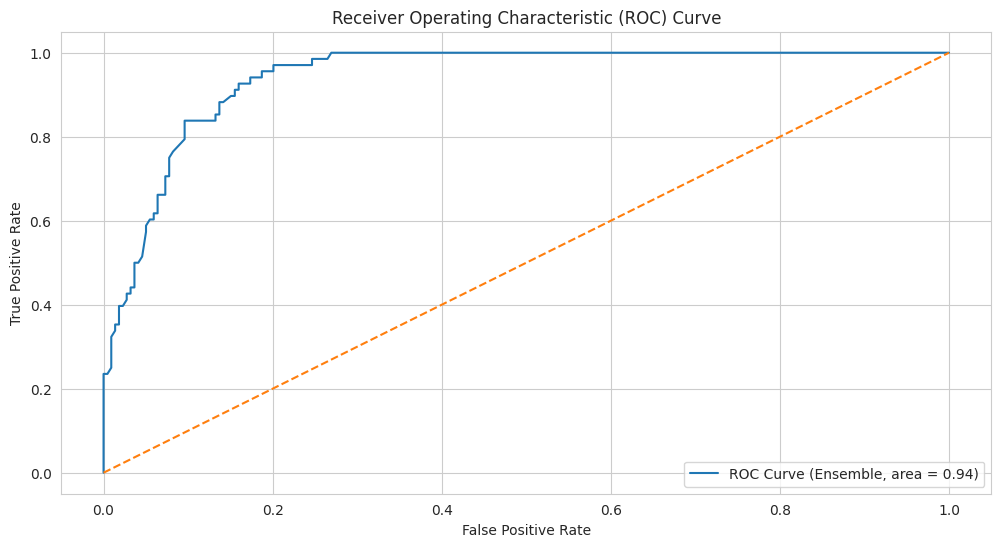

In [17]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Define individual models
log_clf = LogisticRegression(random_state=42)
svc_clf = SVC(probability=True, random_state=42)
rf_clf = best_rf

# Combine models into an ensemble
ensemble_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('svc', svc_clf), ('rf', rf_clf)],
    voting='soft'
)

# Train the ensemble
ensemble_clf.fit(X_train, y_train)

# Predict using the ensemble
y_pred_ensemble = ensemble_clf.predict(X_test)

# Evaluation
print("\nClassification Report (Ensemble):")
print(classification_report(y_test, y_pred_ensemble))

print("\nConfusion Matrix (Ensemble):")
print(confusion_matrix(y_test, y_pred_ensemble))

# Calculate ROC AUC score for the ensemble
roc_auc_ensemble = roc_auc_score(y_test, ensemble_clf.predict_proba(X_test)[:, 1])
print(f"\nROC AUC Score (Ensemble): {roc_auc_ensemble}")

# Plot ROC Curve for the ensemble
fpr_ensemble, tpr_ensemble, thresholds_ensemble = roc_curve(y_test, ensemble_clf.predict_proba(X_test)[:, 1])
plt.figure(figsize=(12, 6))
plt.plot(fpr_ensemble, tpr_ensemble, label=f'ROC Curve (Ensemble, area = {roc_auc_ensemble:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


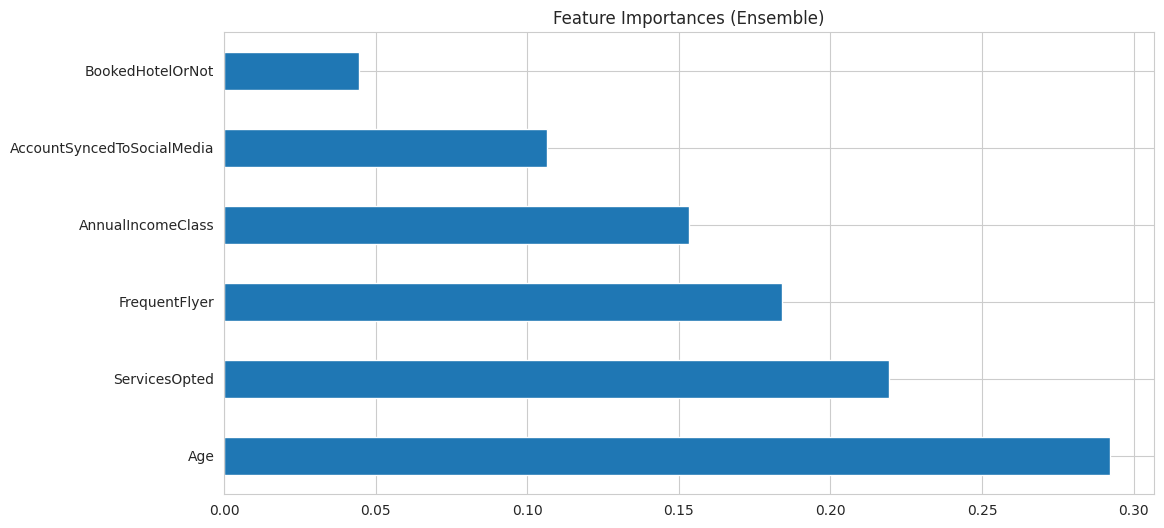

In [18]:
# Plot feature importance for the ensemble
plt.figure(figsize=(12, 6))
ensemble_feature_importances = pd.Series(ensemble_clf.named_estimators_['rf'].feature_importances_, index=X.columns)
ensemble_feature_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importances (Ensemble)')
plt.show()
